<a href="https://colab.research.google.com/github/aerntitty/Hackbio-internship-1/blob/main/drug_discovery2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT QUESTION

Drug Discovery
You have a big table with information about 10,000 different chemicals. Each row is a chemical, and each column describes its properties—like its size, shape, or how it reacts.

Your goal is to understand what makes some chemicals stick better to a special protein called adenosine deaminase (ADA). Scientists measure "stickiness" with a docking score—lower is better!

What do you need to do?
You have two choices for analysis:

Grouping the Chemicals into Clusters (PCA + K-Means Clustering)

Use a method called PCA (Principal Component Analysis) to simplify the chemical data.
Then, use K-Means Clustering to find groups of chemicals that look alike.
Color the groups based on their docking score.
Check if any group has consistently low docking scores (which means they stick well to the protein).
Try to explain why this group is special—what do these chemicals have in common?
Predicting the Docking Score (Regression Model)

Can you guess the docking score of a chemical just by looking at its features?
Train a regression model (a smart math formula) to predict docking scores.
If your model works well, it means scientists could predict which chemicals might work before testing them!
"""

#### WE GOTTA IMPORT A WHOLE LOT FIRST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


**STEP 1**
 Load the Dataset

In [ ]:
url = "https://github.com/HackBio-Internship/2025_project_collection/raw/refs/heads/main/Python/Dataset/drug_class_struct.txt"
df = pd.read_csv(url, sep="\t")
df.head(10)


,ID,score,SMILES,target,MW,MW_EXACT,XLogP,HBA,HBD,LIPINSKI_COUNT,...,BondCount,FSP3,RotBondCount,HalogenCount,SpiroCount,PosCount,NegCount,ComponentCount,SimpleRingCount,AromaticRingCount
0,(DESMILES:6968009),-182.9720,C#Cc1ccccc1-c1c(/C(N)=N/O)cc(C(F)(F)F)cc1-c1cc...,ada,396.36,396.108551,5.95,4,3,1,...,31,0.045,4,3,0,0,0,1,3,3
1,(DESMILES:1090761),-172.2308,CCOC(=O)c1cn[nH]c1S(=O)(=O)NC(CN)C1CCCC1,ada,330.40,330.136169,1.68,8,3,0,...,23,0.692,8,0,0,0,0,1,2,1
2,"(DESMILES:11628423,DESMILES:152270,DESMILES:79...",-166.7088,Cn1cnc(Nc2nc(N[C@H](CNC(=O)O)c3ccc(F)cc3)nc(N3...,ada,457.46,457.198608,2.26,12,4,1,...,37,0.350,8,1,0,0,0,1,4,3
3,(DESMILES:1708673),-164.8812,Cc1ccc(Oc2ccc(Nc3ncnc4cc(CNC(=O)O)[nH]c34)cc2C...,ada,404.42,404.159698,2.18,9,4,0,...,33,0.143,6,0,0,0,0,1,4,4
4,"(DESMILES:2774222,DESMILES:6558061)",-164.5410,CC(NC(=O)O)[C@H](CC1CCCCC1)NC(=O)OC(C)(C)C,ada,314.42,314.220551,3.09,6,3,0,...,23,0.875,6,0,0,0,0,1,1,0
5,(DESMILES:3202376),-164.4433,O=C(O)NCc1ccc(-c2nc3cc[nH]c(=O)c3cc2-c2ccccc2)cc1,ada,371.39,371.126984,1.72,6,3,0,...,31,0.045,4,0,0,0,0,1,4,4
6,(DESMILES:2946922),-162.5844,O=C(O)NCc1ccc(C2CCN(Cc3ccccc3)C2)cc1,ada,310.39,310.168121,2.84,4,2,0,...,25,0.316,5,0,0,0,0,1,3,2
7,(DESMILES:4255347),-160.5429,Cc1ccc(NS(=O)(=O)c2[nH]ncc2C(=O)Nc2ccc3c(c2)OC...,ada,414.44,414.099792,2.89,9,3,0,...,32,0.158,5,0,0,0,0,1,4,3
8,"(DESMILES:203005,DESMILES:4100259)",-158.9743,CCC(C)(C)CC(CNC)NC(=O)N1CCCC(C(OCCNC(=O)O)c2cc...,ada,497.07,496.281647,3.57,8,4,0,...,35,0.680,12,1,0,0,0,1,2,1
9,(DESMILES:2825605),-158.4949,CCOC(=O)c1cn[nH]c1S(=O)(=O)NC1CCNC(C)C1,ada,316.38,316.120514,1.51,8,3,0,...,22,0.667,6,0,0,0,0,1,2,1


**STEP 2**
 Explore the Dataset

In [ ]:

df.isnull().sum() # Check for missing values

,0
ID,0
score,0
SMILES,0
target,0
MW,0
MW_EXACT,0
XLogP,0
HBA,0
HBD,0
LIPINSKI_COUNT,0


In [ ]:


df.describe()

,score,MW,MW_EXACT,XLogP,HBA,HBD,LIPINSKI_COUNT,RO3_COUNT,TPSA_NO,TPSA_NOPS,...,BondCount,FSP3,RotBondCount,HalogenCount,SpiroCount,PosCount,NegCount,ComponentCount,SimpleRingCount,AromaticRingCount
count,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,...,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,94657.000000,94657.0,94657.000000,94657.000000
mean,-71.239180,347.128203,346.775897,2.929218,5.324329,1.444468,0.136208,2.036458,68.515757,72.646957,...,27.054798,0.437362,5.197291,0.660384,0.018065,0.007723,0.005198,1.0,2.940681,1.924823
std,34.456648,84.559882,84.458000,1.931333,1.974769,0.983276,0.345007,0.939163,27.687916,30.146039,...,7.293896,0.203500,2.381108,1.112556,0.134451,0.087900,0.072201,0.0,1.236138,1.100352
min,-182.972000,100.120000,100.052429,-9.560000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,-82.592900,289.170000,288.220154,1.740000,4.000000,1.000000,0.000000,1.000000,49.600000,51.200000,...,22.000000,0.296000,4.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,1.000000
50%,-70.876500,348.430000,348.147400,2.900000,5.000000,1.000000,0.000000,2.000000,67.300000,71.000000,...,27.000000,0.417000,5.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.000000,2.000000
75%,-54.959650,412.610000,412.199829,4.120000,7.000000,2.000000,0.000000,3.000000,86.100000,91.800000,...,33.000000,0.556000,7.000000,1.000000,0.000000,0.000000,0.000000,1.0,4.000000,3.000000
max,4691.141000,499.990000,499.331116,12.640000,15.000000,9.000000,2.000000,4.000000,252.700000,261.100000,...,47.000000,1.000000,21.000000,10.000000,2.000000,2.000000,2.000000,1.0,9.000000,9.000000


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94657 entries, 0 to 94656
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 94657 non-null  object 
 1   score              94657 non-null  float64
 2   SMILES             94657 non-null  object 
 3   target             94657 non-null  object 
 4   MW                 94657 non-null  float64
 5   MW_EXACT           94657 non-null  float64
 6   XLogP              94657 non-null  float64
 7   HBA                94657 non-null  int64  
 8   HBD                94657 non-null  int64  
 9   LIPINSKI_COUNT     94657 non-null  int64  
 10  RO3_COUNT          94657 non-null  int64  
 11  TPSA_NO            94657 non-null  float64
 12  TPSA_NOPS          94657 non-null  float64
 13  HAC                94657 non-null  int64  
 14  AtomCount          94657 non-null  int64  
 15  BondCount          94657 non-null  int64  
 16  FSP3               946

In [ ]:
#Drop 'ID' column
df = df.drop(columns=['ID']) # freaking not important

# Convert object columns to numeric
obj_columns = ['SMILES', 'target']
df[obj_columns] = df[obj_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with 0
df = df.fillna(0)

**STEP 3**
 Identify Chemical Features

In [ ]:
features = df.drop(columns=["score"])  # "score" is the docking score
score = df["score"]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**STEP 4**
 Perform PCA to visualize our data in 2 dimension

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(pca_features, columns=["PC1", "PC2"])
df_pca["score"] = score

**STEP 5**
 Apply K-Means Clustering

In [ ]:



num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_pca["cluster"] = kmeans.fit_predict(pca_features)
df["cluster"] = kmeans.fit_predict(features_scaled)

**STEP 6**
 ITS VISUALIZATION TIMEEEE 🥳

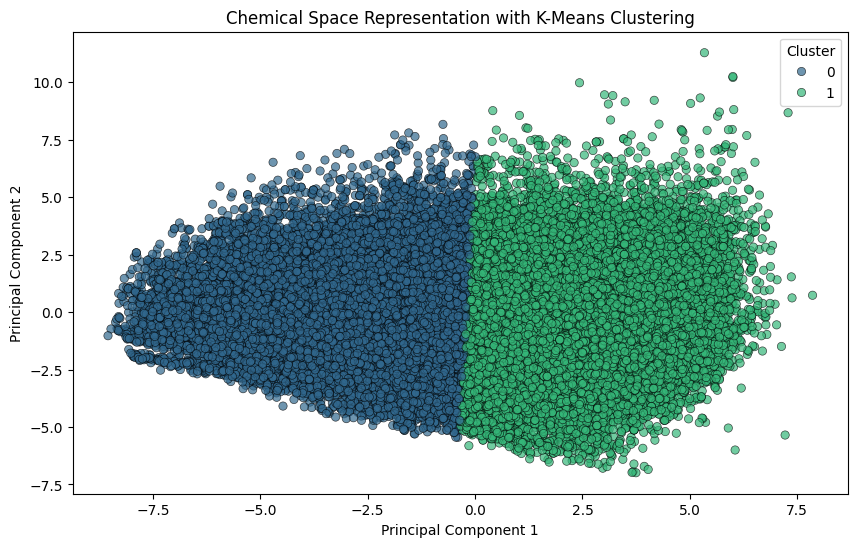

In [ ]:
#CLUSTERING BASED ON K-MEANS COLORING BY CLUSTER
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="cluster", palette="viridis", alpha=0.7, edgecolor="k")
plt.legend(title="Cluster")
plt.title("Chemical Space Representation with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()




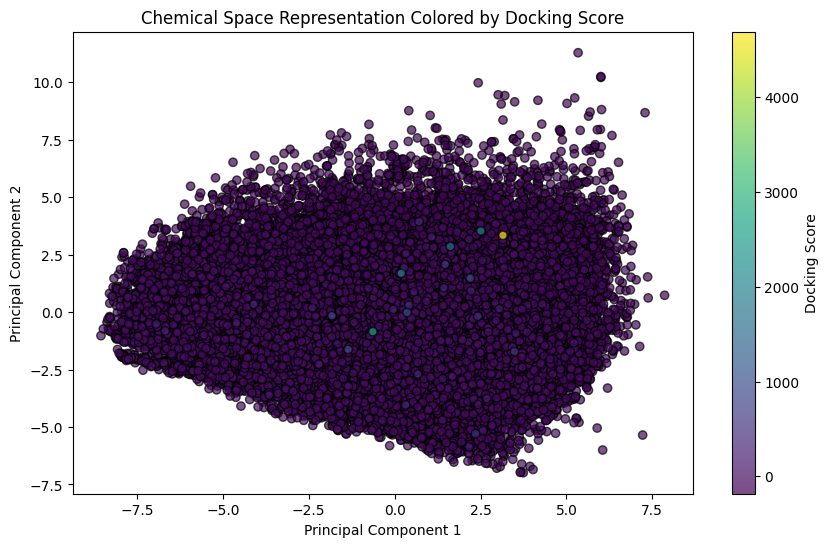

In [ ]:
#CLUSTERING BASED ON K-MEANS COLORING BY DOCKING SCORE

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["score"], cmap="viridis", alpha=0.7, edgecolor="k")
plt.colorbar(label="Docking Score")
plt.title("Chemical Space Representation Colored by Docking Score")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**STEP 7**
    Cluster Analysis

This is to check if any group has consistently low **Docking** scores i.e that they stick well to the protein....

* Docking scores are usually more favorable (better) when they are lower (more negative).
* Looking at your cluster means:
 Cluster 1 Mean: -73.84
 Cluster 0 Mean: -68.16


Since -73.84 is lower than -68.16, **Cluster 1**  has the lower average docking score


**N.B**
    Cluster 1 likely has consistently lower docking scores, but check a **box plot**  to confirm how stable the scores are within the group.

In [ ]:
cluster_analysis = df_pca.groupby("cluster")["score"].agg(["mean", "min", "max", "count"])
cluster_analysis = cluster_analysis.sort_values(by="mean")  # Sort by lowest mean score
print('this is the cluster analysis')
print(cluster_analysis)

this is the cluster analysis
              mean       min       max  count
cluster                                      
1       -73.843378 -182.9720  4691.141  51307
0       -68.156974 -172.2308  2603.559  43350


**STEP 8**
 Identify Most Distinctive Features of Cluster 1

In [ ]:
feature_means = df.groupby("cluster").mean()
feature_means.head(10)

,score,SMILES,target,MW,MW_EXACT,XLogP,HBA,HBD,LIPINSKI_COUNT,RO3_COUNT,...,BondCount,FSP3,RotBondCount,HalogenCount,SpiroCount,PosCount,NegCount,ComponentCount,SimpleRingCount,AromaticRingCount
cluster,,,,,,,,,,,,,,,,,,,,,
0,-68.138504,0.0,0.0,273.326255,273.039792,2.073249,4.225709,1.382506,0.026280,1.314151,...,20.672860,0.517596,4.191172,0.452114,0.014775,0.006402,0.004894,1.0,2.081159,1.171085
1,-73.832682,0.0,0.0,408.858440,408.451061,3.645178,6.243248,1.496294,0.228155,2.640618,...,32.392849,0.370253,6.038841,0.834588,0.020817,0.008827,0.005452,1.0,3.659611,2.555273


In [ ]:
cluster_1_means = feature_means.loc[1]
overall_means = df.mean()
diff = cluster_1_means - overall_means
print("Most Distinctive Features of Cluster 1:")
print(diff.sort_values())  # See which features stand out most by sorting the differences from largest to smallest

Most Distinctive Features of Cluster 1:
score                -2.593502
FSP3                 -0.067110
target                0.000000
SMILES                0.000000
ComponentCount        0.000000
NegCount              0.000254
PosCount              0.001105
SpiroCount            0.002752
HBD                   0.051827
LIPINSKI_COUNT        0.091947
HalogenCount          0.174204
RO3_COUNT             0.604160
AromaticRingCount     0.630450
XLogP                 0.715959
SimpleRingCount       0.718931
RotBondCount          0.841549
HBA                   0.918920
HAC                   4.538430
AtomCount             4.619120
BondCount             5.338051
TPSA_NO               9.952104
TPSA_NOPS            11.046674
MW_EXACT             61.675164
MW                   61.730237
cluster                    NaN
dtype: float64


**STEP 8**
    Visualize Feature Distributions Across Clusters


In [ ]:
important_features = ["MW","MW_EXACT", "TPSA_NO",  "TPSA_NOPS" ,"AtomCount", "BondCount"  , "HAC" , "HBA","RotBondCount","SimpleRingCount", "XLogP"  ,"AromaticRingCount", "HBD"]


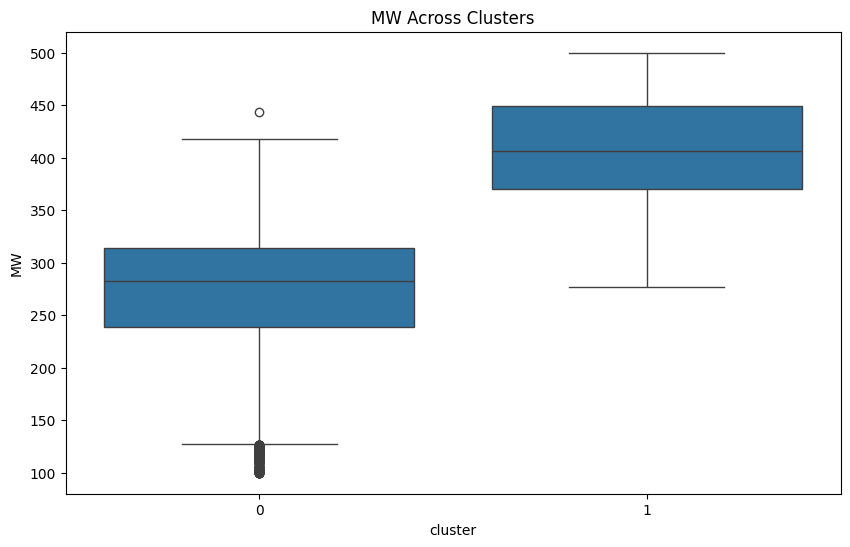

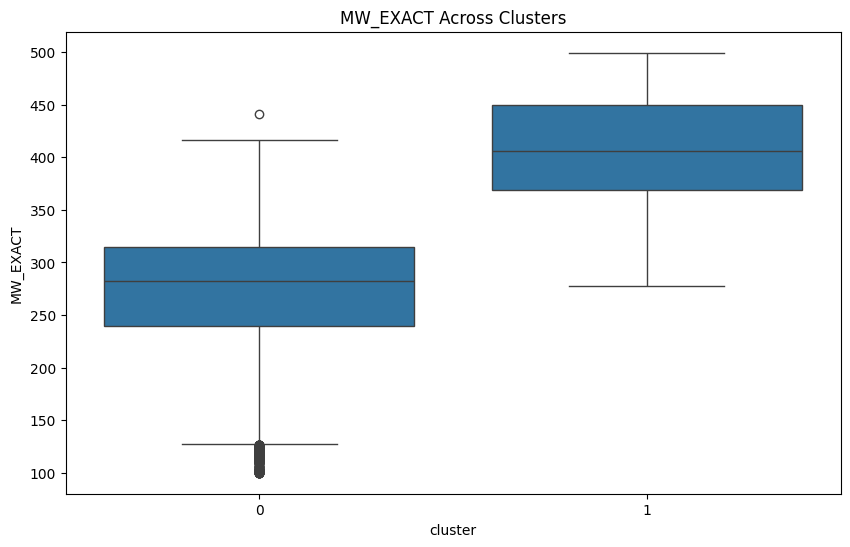

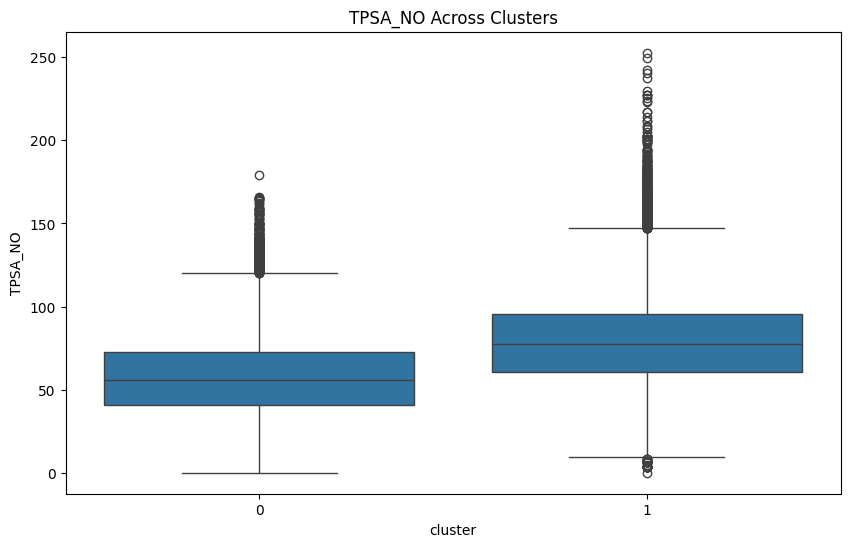

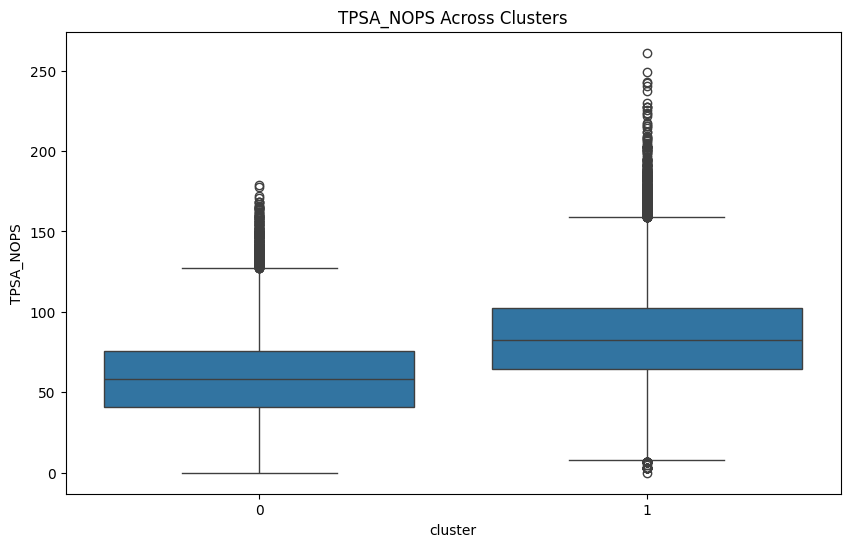

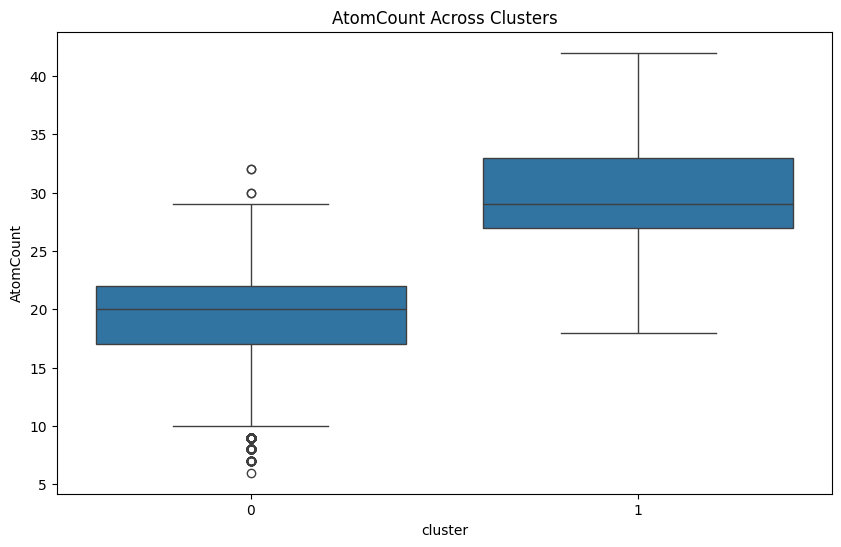

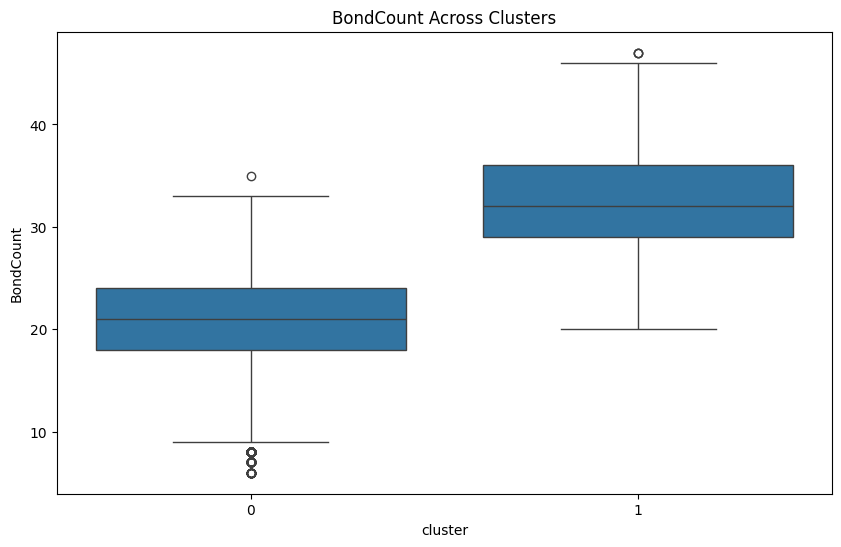

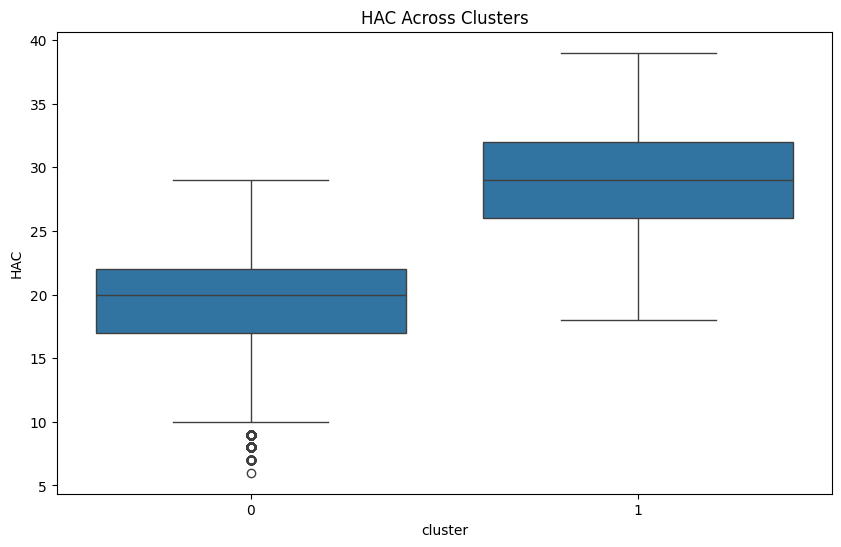

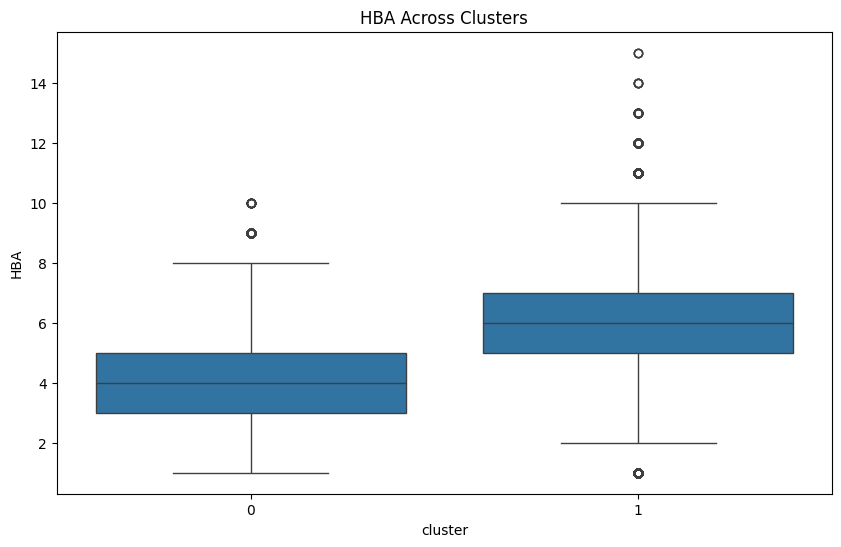

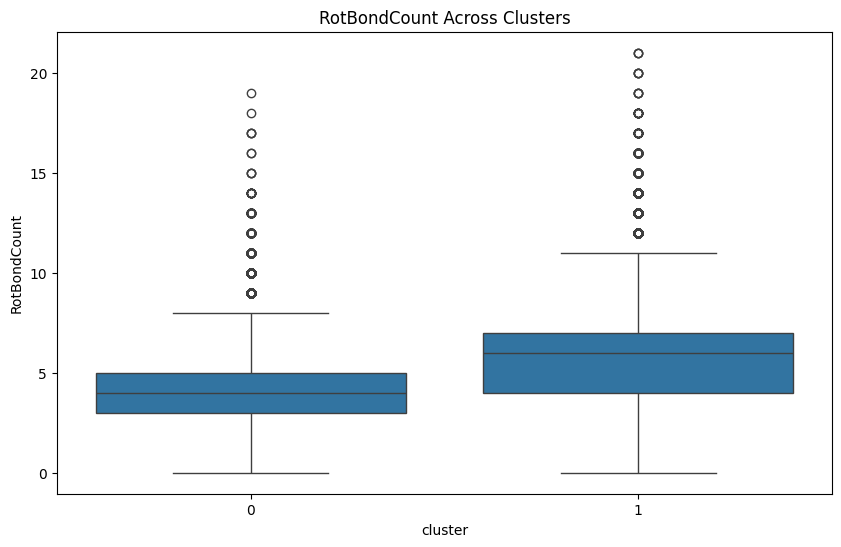

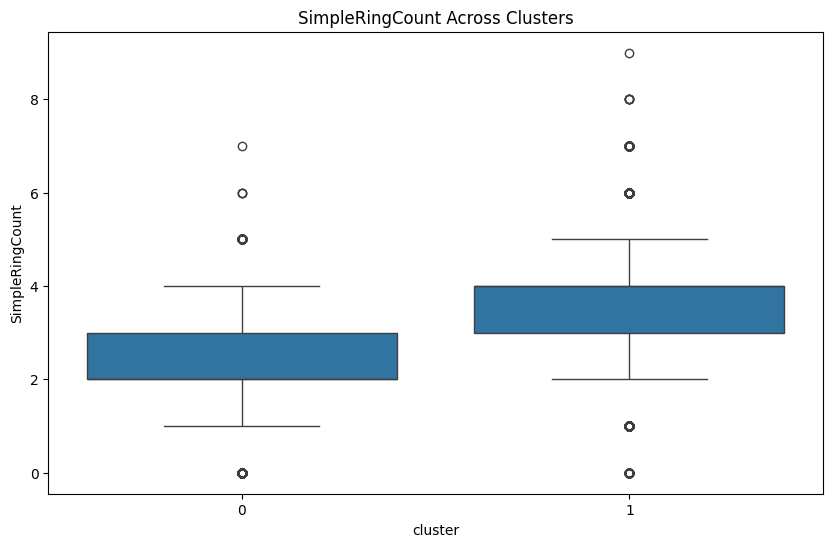

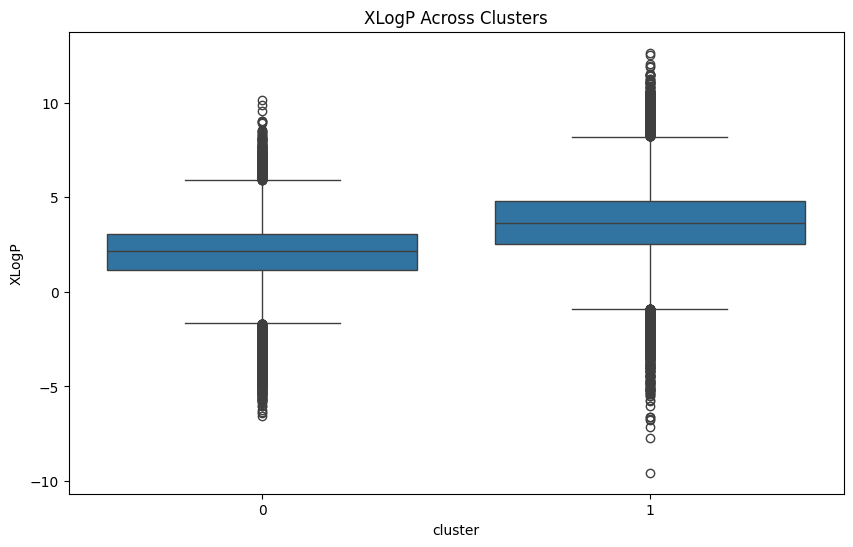

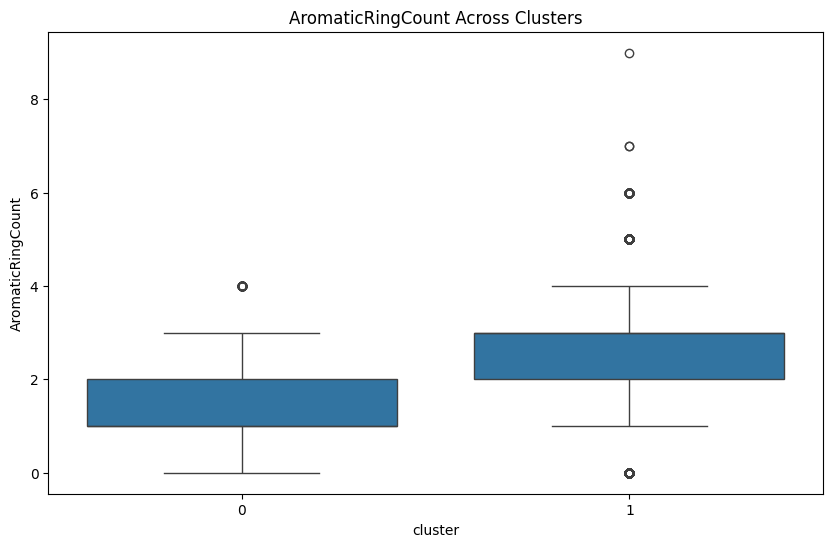

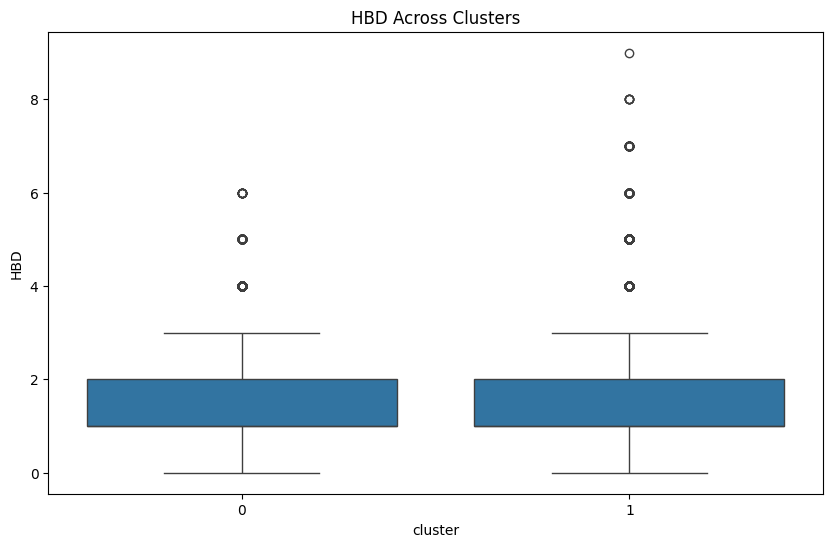

In [ ]:
for feature in important_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_pca["cluster"], y=df[feature])
    plt.title(f"{feature} Across Clusters")
    plt.show()

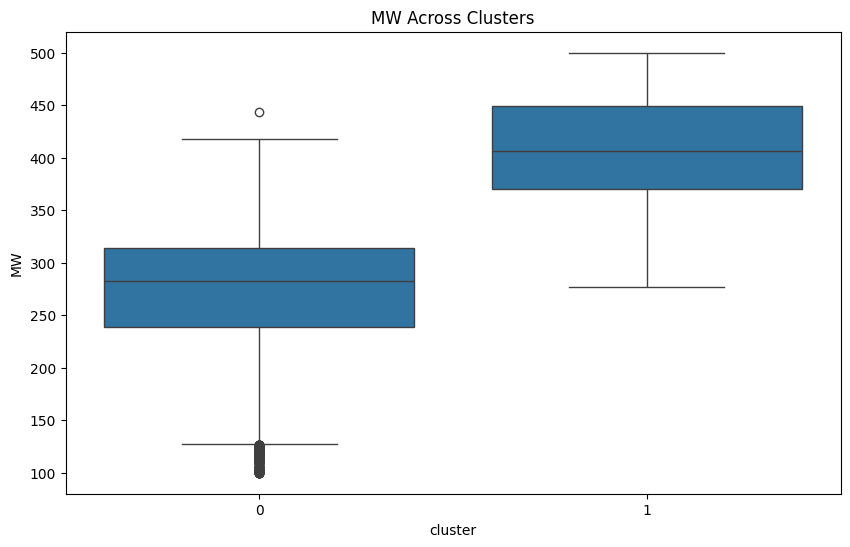

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['MW'])
plt.title(f"MW Across Clusters")
plt.show()

**MOLECULAR WEIGHT PLOT**

Is it smaller/larger molecules? Check MW

This box plot shows the distribution of MW (Molecular Weight) for two different clusters (0 and 1). Here's how to interpret it:

1. Central Tendency (Median)
* The thick horizontal line inside each box represents the median MW for each cluster.
* Cluster 0 has a lower median MW compared to Cluster 1. This means that, on average, the molecules in Cluster 0 have a lower molecular weight than those in Cluster 1.

2. Spread (Interquartile Range - IQR)
* The box itself represents the IQR (middle 50% of the data):
* Cluster 0 has a smaller IQR, meaning its MW values are less spread out.
* Cluster 1 has a larger IQR, indicating that MW values vary more within this cluster.

3. Whiskers (Overall Range Excluding Outliers)
* The whiskers extend to the smallest and largest non-outlier values.
* Cluster 1 has a wider range, meaning MW values in this group vary more.

4. Outliers
> Outliers are represented as small dots outside the whiskers.
* Cluster 0 has several lower MW outliers, indicating that some molecules have significantly lower MW values compared to the rest.
* Cluster 1 doesn’t have many extreme outliers, meaning its MW values are more consistently spread.

**Key Observations**
* Cluster 0 has a lower median MW and more low-value outliers.

→ This suggests that molecules in this cluster tend to have smaller molecular weights overall.
* Cluster 1 has a higher median MW and a larger range.

→ This suggests that molecules in this cluster tend to be heavier and have more variation in MW.

* Cluster 0 has a tighter spread, while Cluster 1 is more spread out.

→ This means Cluster 1 contains more diverse MW values.


**Conclusion**   


From the box plot, we can conclude that **Cluster 0** consists of molecules with lower molecular weights, as shown by its lower median MW and presence of low-value outliers. In contrast, **Cluster 1** contains molecules with higher molecular weights and greater variation, indicating a broader range of molecular sizes.

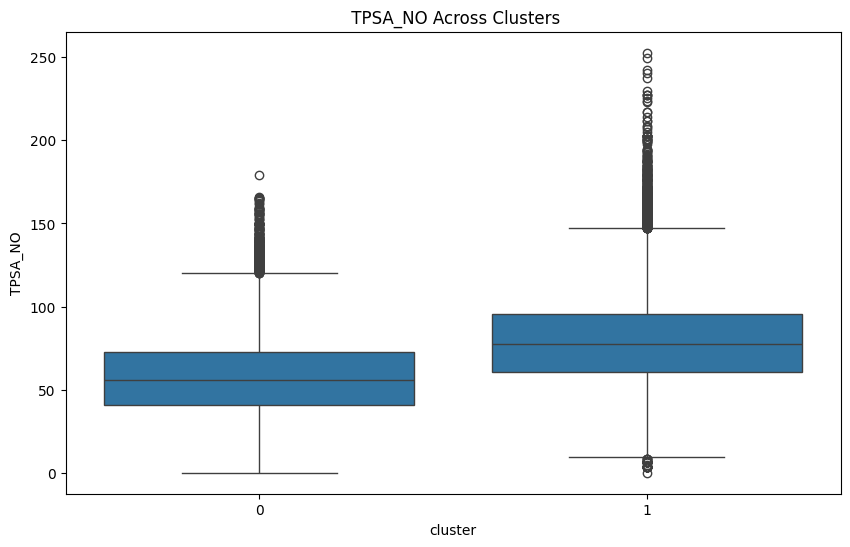

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['TPSA_NO'])
plt.title(" TPSA_NO Across Clusters")
plt.show()

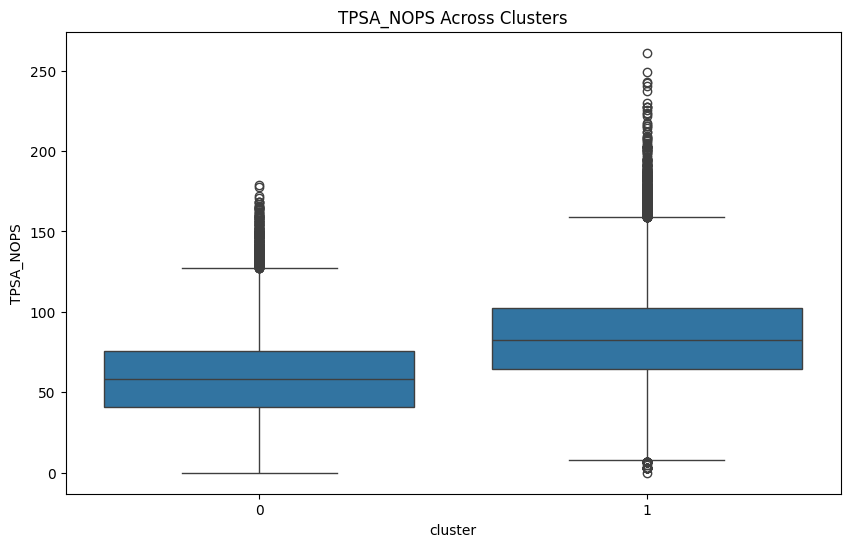

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['TPSA_NOPS'])
plt.title("TPSA_NOPS Across Clusters")
plt.show()



**What is TPSA**

>TPSA (Topological Polar Surface Area) is a molecular descriptor used in drug discovery and medicinal chemistry to estimate a molecule's ability to interact with biological environments, particularly in terms of solubility and permeability

>TPSA measures the total surface area of polar atoms (usually oxygen, nitrogen, and attached hydrogens) in a molecule. It is expressed in square angstroms (Å²) and is used to predict drug absorption, bioavailability, and blood-brain barrier permeability.


TPSA_NO vs. TPSA_NOPS


TPSA_NO: Polar surface area calculated using only Nitrogen (N) and Oxygen (O) atoms.


TPSA_NOPS: Polar surface area including Nitrogen (N), Oxygen (O), Phosphorus (P), and Sulfur (S) atoms.










1. TPSA_NO Across Clusters :

* The median TPSA_NO (Total Polar Surface Area considering only Nitrogen and Oxygen) is slightly higher in Cluster 1 compared to Cluster 0.

* The interquartile range (IQR, the box part) is quite similar for both clusters, meaning the middle 50% of the data is spread over a similar range.

* Outliers: Both clusters have several outliers above the upper whisker, meaning a few data points have much higher TPSA_NO values compared to the majority.

* Whisker length is similar, suggesting that the variability outside the IQR is comparable in both clusters.

**Takeaway**

Cluster 1 has a slightly higher TPSA_NO, but overall, the distributions are quite similar, meaning TPSA_NO might not strongly differentiate between the clusters.




2. TPSA_NOPS Across Clusters :


* The median TPSA_NOPS (Total Polar Surface Area considering Nitrogen, Oxygen, Phosphorus, and Sulfur) is also slightly higher in Cluster 1.

* The IQRs for both clusters are nearly the same, indicating similar variation in this property across clusters.

* Outliers: There are still several outliers beyond the upper whisker, showing that a few compounds have much higher TPSA_NOPS values.

* The whiskers extend to similar ranges in both clusters, suggesting comparable spread of the data.

**Takeaway**

Again, Cluster 1 has a slightly higher TPSA_NOPS,
but since the distributions are very similar, TPSA_NOPS does
 not seem to be a strong distinguishing factor between the two clusters.




















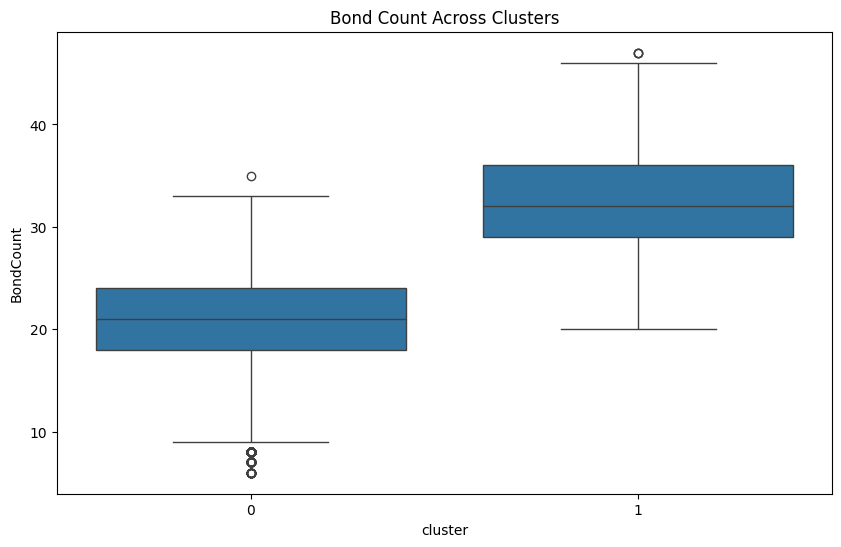

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['BondCount'])
plt.title("Bond Count Across Clusters")
plt.show()

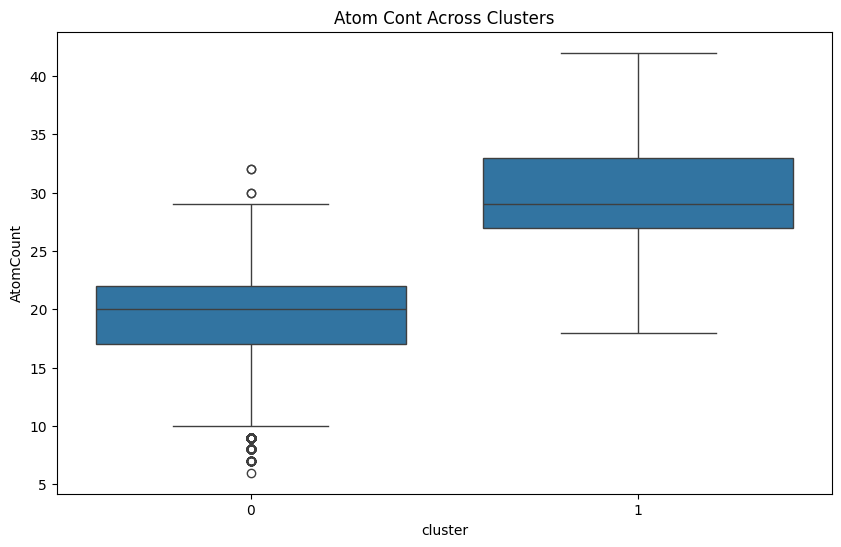

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['AtomCount'])
plt.title("Atom Cont Across Clusters")
plt.show()

### **Analysis of BondCount and AtomCount Across Clusters**

#### **BondCount Across Clusters**
- The box plot for **BondCount** shows a clear difference between Cluster 0 and Cluster 1.
- **Cluster 0** has a lower median BondCount, with values mostly concentrated around 20-25. However, it also has a few outliers with lower BondCounts.
- **Cluster 1** exhibits a significantly higher median BondCount, with values mainly between 30-40, indicating that molecules in this cluster tend to have more bonds.
- The wider spread in Cluster 1 suggests greater variability in the number of bonds, with a few extreme outliers having even higher BondCounts.
  
  **Interpretation:**  
  - Since BondCount is directly related to molecular complexity, **Cluster 1 molecules are structurally more complex** than those in Cluster 0.
  - More bonds often mean larger molecular frameworks, which could **affect stability, reactivity, and drug-likeness** properties.

#### **AtomCount Across Clusters**
- The **AtomCount** distribution follows a similar trend to BondCount.
- **Cluster 0** has a lower median AtomCount (~20), with values spread between 15-25 and a few outliers on the lower end.
- **Cluster 1** has a much higher median (~30), with some molecules containing **more than 40 atoms**.
- The variation in AtomCount is larger in Cluster 1, showing that molecules in this group exhibit a broader range of atomic compositions.

  **Interpretation:**  
  - **Molecules in Cluster 1 have significantly more atoms**, making them **larger and structurally more intricate**.
  - A higher AtomCount could influence **molecular weight, solubility, and permeability**—important factors in drug design.
  - Since AtomCount and BondCount are strongly correlated, the molecular frameworks in **Cluster 1 are likely larger and more rigid**, whereas **Cluster 0 molecules might be smaller and more flexible**.

### **Overall Implication**
- **Cluster 0 molecules are smaller and less complex**, which might make them more **soluble and easily absorbed** in biological systems.
- **Cluster 1 molecules are larger with more atoms and bonds**, meaning they might require **specialized transport mechanisms** in drug delivery, as size and complexity can affect bioavailability.


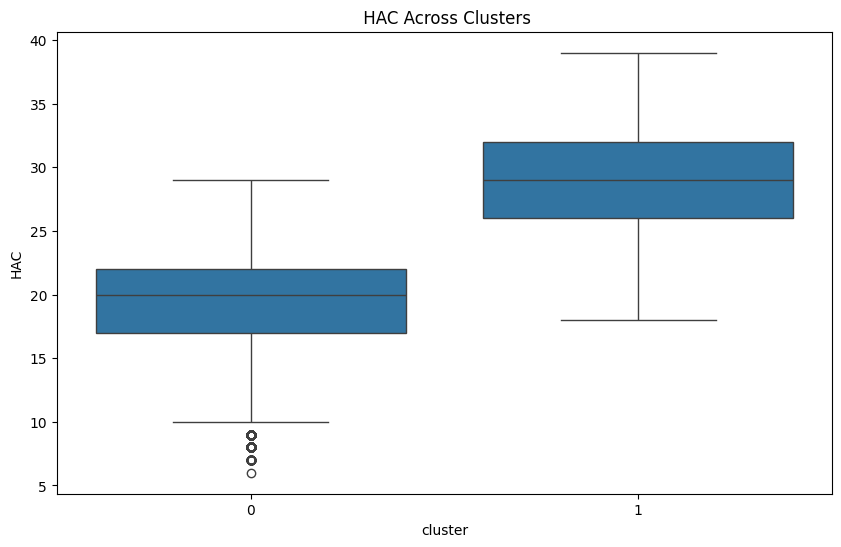

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['HAC'])
plt.title(" HAC Across Clusters")
plt.show()

### **HAC (Heavy Atom Count) Across Clusters**

#### **Observations:**
- The box plot reveals a distinct difference in **Heavy Atom Count (HAC)** between the two clusters.
- **Cluster 0** has a lower median HAC, with values mainly ranging from **10 to 25**, though a few outliers exist below 10.
- **Cluster 1** has a significantly higher median HAC, ranging between **20 and 35**, with some molecules having a HAC close to 40.
- The spread (interquartile range) in **Cluster 1** is wider than in **Cluster 0**, suggesting greater molecular diversity in terms of heavy atom composition.

#### **Interpretation:**
- **Heavy Atom Count (HAC)** represents the number of non-hydrogen atoms in a molecule, which is crucial for understanding molecular size and complexity.
- **Cluster 1 molecules are larger and contain more heavy atoms**, making them potentially **more stable, less volatile, and possibly harder to metabolize** in biological systems.
- **Cluster 0 molecules have fewer heavy atoms**, indicating **smaller and possibly more flexible structures**, which might lead to **better solubility and easier metabolism**.

#### **Potential Implications in Drug Discovery:**
- **Cluster 1 molecules** may exhibit **higher lipophilicity**, leading to **better membrane permeability** but also increasing the risk of **poor water solubility**.
- **Cluster 0 molecules** might be **more bioavailable** due to their **lower size and higher solubility**, making them **better candidates for oral drug formulations**.



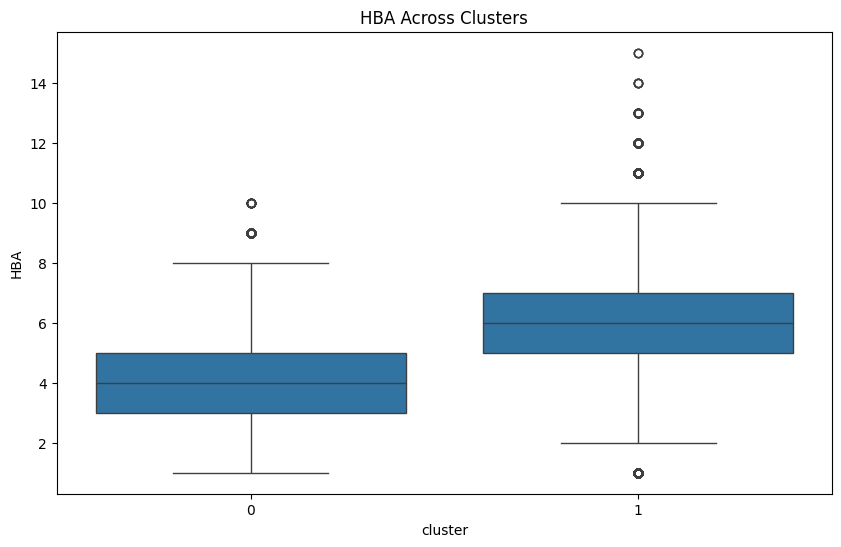

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['HBA'])
plt.title("HBA Across Clusters")
plt.show()

**HBA PLOT**


**What is HBA?**

**HBA (Hydrogen Bond Acceptors)** refers to the number of atoms in a molecule that can accept hydrogen bonds, typically oxygen and nitrogen atoms with lone pairs.

* A higher HBA value means the molecule has more polar functional groups, making it more water-soluble but possibly harder to pass through lipid membranes.
* A lower HBA value means the molecule is less polar, potentially improving membrane permeability but reducing solubility.
> **In drug discovery, Lipinski’s Rule of Five suggests that an ideal drug should have HBA ≤ 10 for good bioavailability.**


1. Central Tendency (Median):

* The median (central line in the box) of Cluster 0 is lower than that of Cluster 1, indicating that the typical HBA value in Cluster 1 is higher.
* This suggests that molecules in Cluster 1 generally have more hydrogen bond acceptors compared to those in Cluster 0.

2. Spread (Interquartile Range, IQR):
* The IQR (width of the box) for Cluster 1 is larger than that of Cluster 0, meaning that the HBA values in Cluster 1 are more widely dispersed.
* Cluster 0 has a narrower IQR, indicating that most of its data points are more concentrated around the median.

3. Whiskers (Data Distribution Range):
**The whiskers represent the range of values excluding outliers.**
* Cluster 1 has longer whiskers, showing that it has a broader range of values compared to Cluster 0.
* Cluster 0's shorter whiskers indicate that its values are more compact and less variable.

4. Outliers:


Both clusters contain outliers (data points outside the whiskers, shown as dots).
* Cluster 1 has more extreme outliers, with HBA values significantly higher than the upper whisker.


This suggests that some molecules in Cluster 1 have exceptionally high hydrogen bond acceptor counts, which might be chemically significant.

**Key Observations**

→ Cluster 1 has a higher median HBA value, indicating that its molecules have more hydrogen bond acceptors on average.

→ Cluster 1 exhibits a greater spread, suggesting more variation in HBA values compared to Cluster 0.

→ The presence of multiple outliers in Cluster 1 suggests that some molecules have exceptionally high HBA values, while Cluster 0 has fewer extreme values.

→ Cluster 0 is more compact, with most data points concentrated within a smaller range.

**Conclusion**


This analysis shows that **Cluster 1** contains molecules with a higher number of hydrogen bond acceptors and greater variability, while **Cluster 0** has lower HBA values with less variation.

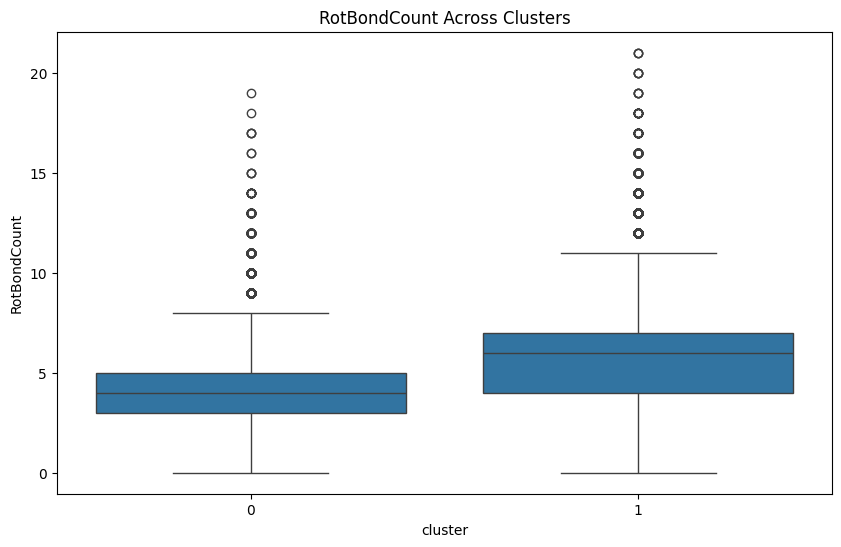

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_pca["cluster"], y=df['RotBondCount'])
plt.title("RotBondCount Across Clusters")
plt.show()

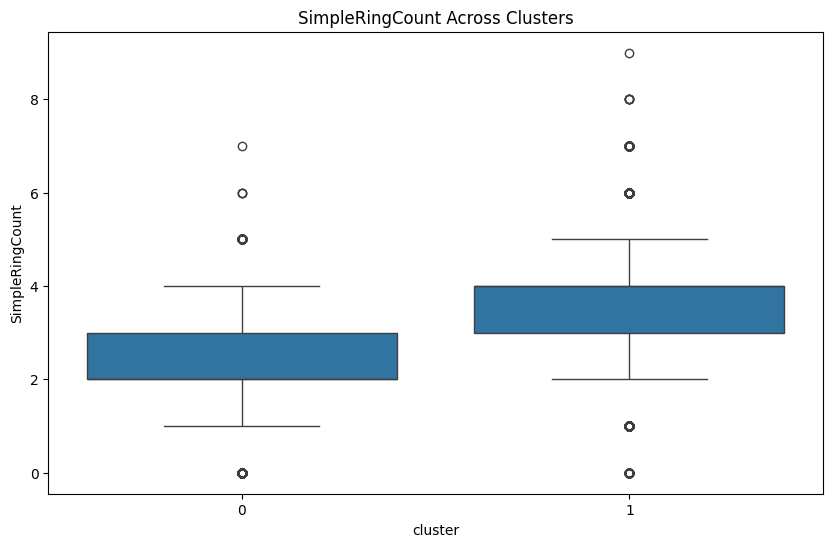

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['SimpleRingCount'])
plt.title("SimpleRingCount Across Clusters")
plt.show()

### **Analysis of SimpleRingCount and RotBondCount**

#### **1. Rotatable Bond Count (RotBondCount) Across Clusters**
- **Cluster 1 has a higher median RotBondCount than Cluster 0.**
  - This suggests that molecules in Cluster 1 generally have more rotatable bonds, indicating greater molecular flexibility.
  - Flexible molecules can adapt their conformation to fit into different biological targets, which might enhance binding efficiency in drug discovery.
- **Wider spread in Cluster 1:**
  - The interquartile range (IQR) of Cluster 1 is larger, indicating more variability in rotatable bond counts.
  - More outliers in Cluster 1 suggest the presence of highly flexible molecules, which may affect drug-likeness.
- **Implication for Drug Discovery:**
  - Higher flexibility can be beneficial in lead optimization, but excessive rotatable bonds may lead to poor oral bioavailability (Lipinski's Rule of Five suggests ≤10 rotatable bonds for good absorption).
  - Cluster 1 compounds may need further optimization to balance flexibility with drug-like properties.

#### **2. Simple Ring Count (SimpleRingCount) Across Clusters**
- **Cluster 1 has a higher median SimpleRingCount than Cluster 0.**
  - A higher ring count is often associated with drug-like molecules, particularly for stability and target interaction.
  - Many approved drugs contain aromatic or heterocyclic rings that enhance binding affinity and metabolic stability.
- **Larger spread and more outliers in Cluster 1:**
  - Suggests that Cluster 1 contains a diverse range of ring-containing molecules, which may be advantageous in binding to different protein targets.
- **Implication for Drug Discovery:**
  - Higher ring count in Cluster 1 suggests a greater likelihood of possessing strong drug-likeness properties.
  - However, excessive ring structures might lead to poor solubility, which should be considered during lead optimization.

### **Overall Drug Discovery Potential of Cluster 1**
- **Advantages:**
  - More rotatable bonds → Potentially better target adaptability.
  - Higher simple ring count → Likely increased target binding potential.
  - Greater molecular diversity → Broader applicability in drug discovery.
- **Challenges:**
  - Excessive flexibility (high rotatable bonds) can lead to poor oral bioavailability.
  - High ring count could affect solubility and metabolic stability.

### **Conclusion**
Cluster 1 appears to have promising drug-like features, with a good balance of flexibility and structural stability. However, further screening is needed to filter out molecules that may have poor bioavailability or solubility issues.

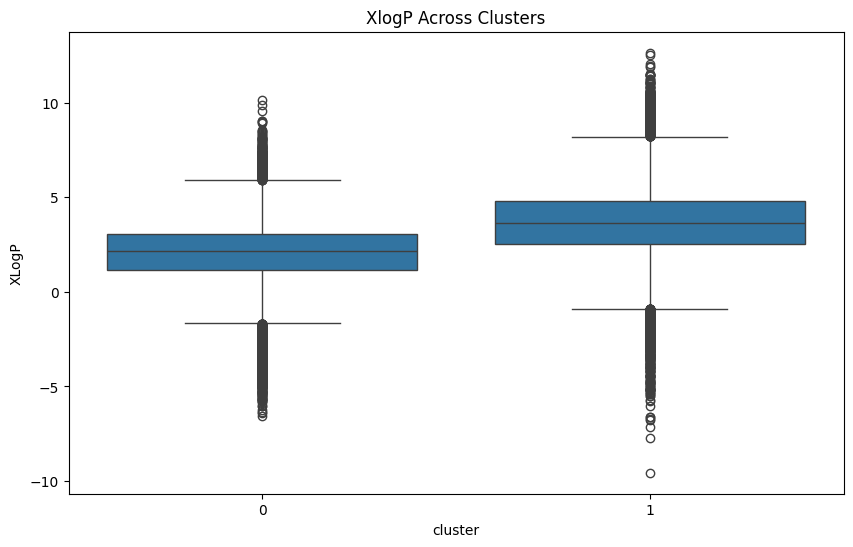

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['XLogP'])
plt.title("XlogP Across Clusters")
plt.show()

**Analysis of XLogP Across Clusters**


**What is XLogP?**

XLogP is a measure of a molecule's lipophilicity, which refers to how well a compound dissolves in fats, oils, and non-polar solvents versus water.

* A higher XLogP value means the molecule is more hydrophobic (lipophilic), meaning it prefers non-polar environments and is less soluble in water.

* A lower or negative XLogP value means the molecule is more hydrophilic, meaning it dissolves well in water but not in lipids.

Lipophilicity is important in drug discovery because:

N.B;
*Too high XLogP (above 5) may lead to poor solubility and bioavailability. Too low XLogP (negative values) means the drug may not easily pass through cell membranes.*


1. Central Tendency (Median):
* luster 1 has a higher median XLogP than Cluster 0.

* This suggests that molecules in Cluster 1 are generally more lipophilic (hydrophobic) compared to those in Cluster 0.


2. Spread (Interquartile Range, IQR):


* Cluster 1 has a wider IQR than Cluster 0, indicating that the middle 50% of the data has more variation in lipophilicity.

* Cluster 0 has a slightly more compact IQR, meaning its molecules have a more consistent range of XLogP values.

3. Whiskers (Data Distribution Range):
**The whiskers represent the range of values excluding outliers.**
* Both clusters have similar whisker ranges, but Cluster 1 extends slightly further into positive XLogP values, indicating that it contains more highly lipophilic molecules


4. Outliers:

* Both clusters have numerous outliers, particularly on the lower end (negative XLogP values), meaning some molecules are highly hydrophilic.


* However, Cluster 1 shows more outliers with high XLogP values (>10), suggesting that it contains molecules with extreme lipophilicity.

**Key Observations**

→ Cluster 1 is characterized by higher lipophilicity, meaning it contains more molecules that are hydrophobic and likely more membrane-permeable.

→ Cluster 0 has lower XLogP values on average, suggesting it contains more hydrophilic molecules.

→ There are more extreme high-XLogP outliers in Cluster 1, possibly representing highly non-polar compounds.



**Conclusion**

>Lipophilicity (XLogP) appears to be a distinguishing factor between the two clusters. Cluster 1 molecules tend to be more hydrophobic, whereas Cluster 0 molecules are relatively more hydrophilic.













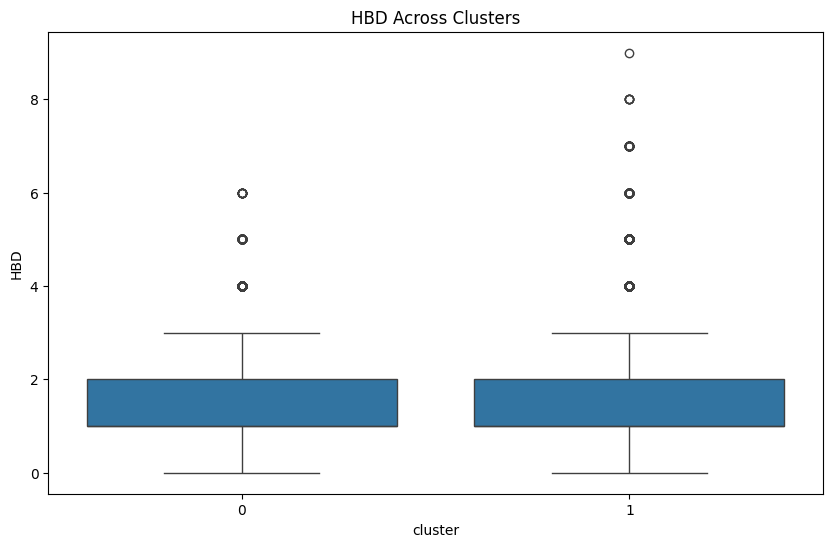

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['HBD'])
plt.title(f"HBD Across Clusters")
plt.show()

**HBD PLOT**

HBD (Hydrogen Bond Donors) refers to the number of atoms in a molecule that can donate hydrogen bonds, typically hydroxyl (-OH) and amine (-NH) groups which improve water solubility but can reduce membrane permeability.
Lower HBD values suggest more lipophilic molecules, which might pass through membranes more easily but have lower solubility.

> Lipinski’s Rule of Five states that an ideal drug should have HBD ≤ 5 for good oral bioavailability

**HBD (Hydrogen Bond Donors) ** refers to the number of atoms in a molecule that can donate hydrogen bonds, typically hydroxyl (-OH) and amine (-NH) groups.

Higher HBD values indicate more hydrophilic molecules, which improve water solubility but can reduce membrane permeability.
Lower HBD values suggest more lipophilic molecules, which might pass through membranes more easily but have lower solubility.
Lipinski’s Rule of Five states that an ideal drug should have HBD ≤ 5 for good oral bioavailability

1. Central Tendency (Median):
* The median HBD (central line in the box) appears similar for both clusters.

* This suggests that the typical HBD value is nearly identical between Cluster 0 and Cluster 1.


2. Spread (Interquartile Range, IQR):


* Both clusters have a similar IQR, meaning the middle 50% of the data is spread within a comparable range for both clusters.

* This indicates that the variability in HBD values is quite uniform between the two groups.

3. Whiskers (Data Distribution Range):
**The whiskers represent the range of values excluding outliers.**
* The whiskers extend to approximately the same range for both clusters, meaning the majority of the data points fall within similar bounds.

* This suggests that the general distribution of HBD values is consistent across both clusters.


4. Outliers:

Both clusters contain several outliers (data points outside the whiskers, shown as dots).

* The outliers represent molecules with exceptionally high hydrogen bond donor values (above 4).

Since both clusters exhibit similar outlier patterns, this suggests that extreme values of HBD are present at similar frequencies across the two clusters.

**Key Observations**

→ The median HBD is similar for both clusters, suggesting no significant difference in central tendency.

→ Both clusters have a similar IQR, meaning their overall spread is comparable.

→ Whiskers extend to similar values, showing that the general range of HBD values is consistent between the clusters.

→ Multiple outliers are present in both clusters, with some molecules having high HBD values above 6, possibly indicating highly hydrogen-bonding molecules.

**Conclusion**

Unlike the Hydrogen Bond Acceptors (HBA) distribution (which showed a clear difference between clusters), the Hydrogen Bond Donors (HBD) distribution is quite similar across Cluster 0 and Cluster 1. Both clusters contain molecules with comparable HBD values, spread, and extreme outliers.


>This suggests that HBD may not be a major distinguishing factor between the two clusters in this datase.











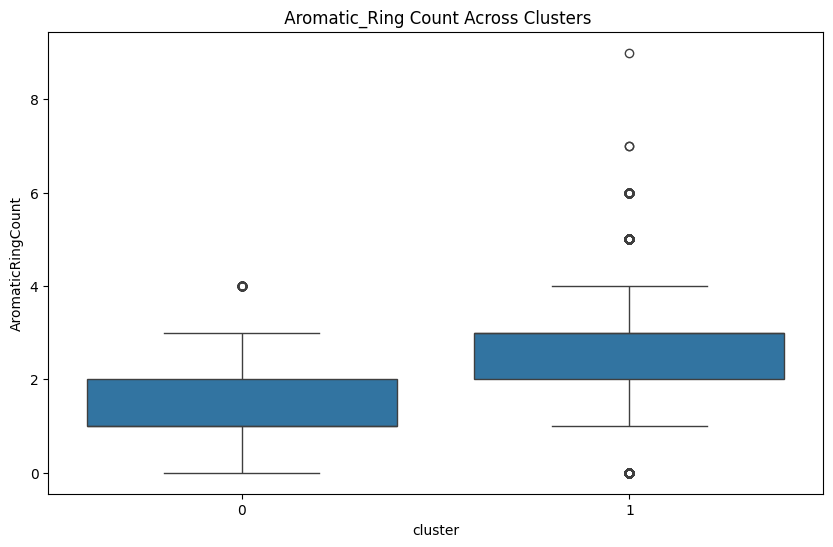

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pca["cluster"], y=df['AromaticRingCount'])
plt.title(" Aromatic_Ring Count Across Clusters")
plt.show()

**What is Aromatic Ring Count?**

>Aromatic rings (e.g., benzene rings) play a significant role in drug design because they:

* Improve molecular stability
* Enhance membrane permeability
* Increase binding affinity to target proteins



However, too many aromatic rings can reduce solubility and increase metabolic instability.




1. Median Aromatic Ring Count:

* Cluster 1 has a higher median aromatic ring count than Cluster 0.


* This suggests that molecules in Cluster 1 tend to have more aromatic rings, which might imply greater structural rigidity and potential interactions with biological targets (e.g., drug-like properties).


2. Spread (Interquartile Range, IQR):


* Cluster 1 has a wider IQR, meaning its molecules exhibit more variation in aromatic ring count.

* Cluster 0 has a more compact IQR, suggesting a more consistent range of aromatic rings per molecule.

3. Whiskers (Data Distribution Range):
**The whiskers represent the range of values excluding outliers.**
* Cluster 1 has a longer upper whisker, meaning some molecules contain a significantly higher number of aromatic rings.


* Cluster 0’s whiskers are shorter, indicating that most molecules have a lower and less varied aromatic ring count.

4. Outliers:

* Both clusters have several high-value outliers, but Cluster 1 has more extreme cases (up to 8 aromatic rings).

* The outliers represent molecules with exceptionally high hydrogen bond donor values (above 4).


**Key Observations**

→ Cluster 1 contains more aromatic-rich molecules, which could indicate better stability, hydrophobic interactions, or drug-like behavior.


→ Cluster 0 has fewer aromatic rings on average, suggesting molecules may be more aliphatic or flexible in structure.

→ Whiskers extend to similar values, showing that the general range of HBD values is consistent between the clusters.

→ The presence of outliers in both clusters suggests some molecules have unusual structural characteristics that may impact their chemical behavior.

**Conclusion**

The difference in aromatic ring count between the clusters suggests a structural distinction, which could impact solubility, interaction with biomolecules, and potential drug-like properties.
















### **OVERALL ANALYSIS OF CLUSTER 1**  

The clustering analysis of molecular descriptors reveals distinct yet overlapping properties between Cluster 0 and Cluster 1. By examining molecular weight (MW), lipophilicity (XLogP), hydrogen bonding capabilities (HBA & HBD), aromaticity (AromaticRingCount), polar surface area (TPSA_NO & TPSA_NOPS), molecular flexibility (RotBondCount), structural complexity (BondCount & AtomCount), and solubility factors (HAC), we gain a deeper understanding of Cluster 1’s characteristics in comparison to Cluster 0.

#### **1. Molecular Complexity and Size (BondCount & AtomCount)**
- **Cluster 1 molecules are structurally more complex**, with a significantly higher median **BondCount (30-40)** and **AtomCount (~30)** than Cluster 0.
- Greater molecular complexity often correlates with increased molecular weight, rigidity, and stability, influencing drug-like properties.
- **Implication:** Larger, more intricate molecular frameworks in Cluster 1 may lead to higher target specificity but could impact solubility and bioavailability.

#### **2. Molecular Weight (MW)**
- Cluster 1 exhibits a higher median molecular weight than Cluster 0, with a wider spread of values and more high-MW outliers.
- **Implication:** Heavier molecules may face challenges in absorption and distribution, requiring specialized delivery mechanisms.

#### **3. Lipophilicity (XLogP) and Solubility (HAC)**
- Cluster 1 molecules have a **higher median XLogP**, indicating increased lipophilicity.
- Higher **HAC (Heavy Atom Count)** suggests that Cluster 1 molecules may be **less soluble in water** but have **better membrane permeability**.
- **Implication:** While lipophilicity can improve cell membrane penetration, it may also lead to poor water solubility, requiring formulation adjustments.

#### **4. Hydrogen Bonding Capacity (HBA & HBD)**
- Cluster 1 has a higher **hydrogen bond acceptor (HBA) count** and a slightly increased **hydrogen bond donor (HBD) count**.
- **Implication:** Stronger hydrogen bonding potential may enhance biological interactions but could also reduce permeability.

#### **5. Aromaticity (Aromatic Ring Count)**
- Cluster 1 contains **a higher number of aromatic rings**, contributing to **structural rigidity and potential receptor binding interactions**.
- **Implication:** Increased aromaticity enhances molecular stability and target affinity but may reduce solubility.

#### **6. Molecular Flexibility (RotBondCount)**
- Cluster 1 exhibits **a higher median RotBondCount**, suggesting **greater molecular flexibility**.
- **Implication:** Increased flexibility may improve conformational adaptability for binding but can also impact metabolic stability.

#### **7. Structural Rigidity and Drug-Likeness (SimpleRingCount)**
- Cluster 1 has a **higher SimpleRingCount**, indicating that its molecules may possess **stronger binding interactions** with biological targets.
- **Implication:** While rigidity can improve receptor binding, excessive rings could reduce solubility.

#### **8. Polar Surface Area (TPSA_NO & TPSA_NOPS)**
- Cluster 1 has a slightly **higher TPSA**, though this difference is not as pronounced.
- **Implication:** While increased polarity aids solubility, it might not be the defining factor for Cluster 1 molecules.

### **Final Interpretation**
Cluster 1 consists of **larger, more complex, and more lipophilic molecules** that exhibit **higher molecular weight, increased hydrogen bonding capacity, and stronger receptor binding potential due to aromaticity and rigidity**. However, their **higher bond count, atom count, and rotatable bonds suggest both structural complexity and flexibility**, which may affect drug metabolism and pharmacokinetics.

While these molecules might **excel in membrane permeability and receptor affinity**, challenges related to **solubility, bioavailability, and formulation strategies** should be considered during drug development.

**STEP9**

Heat Map plot

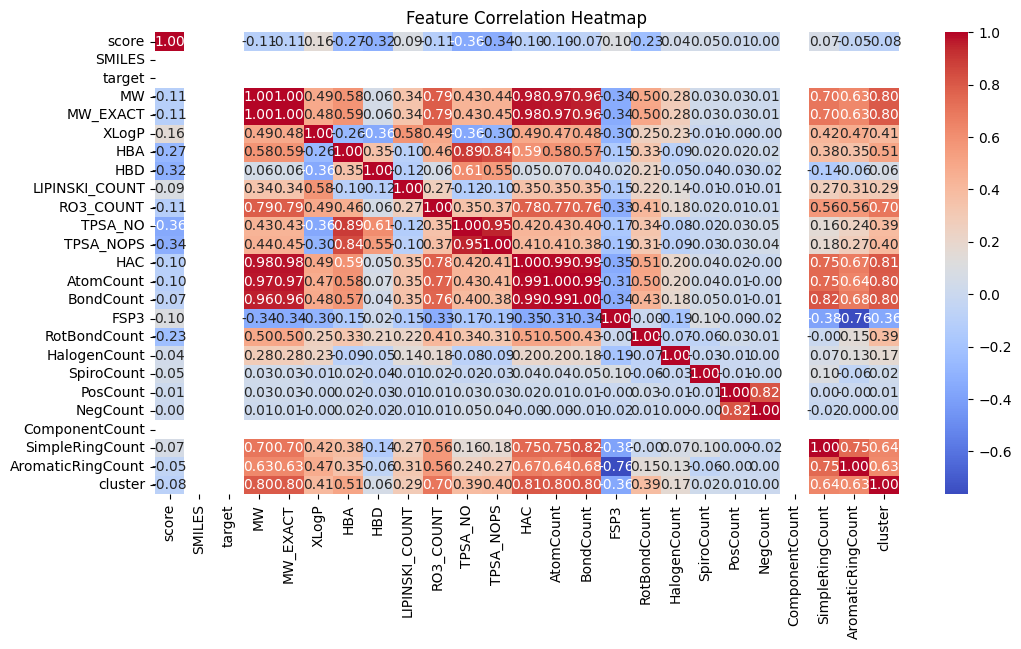

In [ ]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### **Explanation of the Feature Correlation Heatmap**  

This **Feature Correlation Heatmap** visually represents how different molecular descriptors are correlated with each other. Correlation values range from **-1 to 1**, where:  
- **1 (Red)**: Strong positive correlation (when one feature increases, the other also increases).  
- **0 (White/Neutral)**: No correlation.  
- **-1 (Blue)**: Strong negative correlation (when one feature increases, the other decreases).  

#### **Key Observations from the Heatmap**  

1. **Highly Correlated Features (Strong Positive Correlations)**
   - **MW (Molecular Weight) is strongly correlated with:**
     - **AtomCount (0.97)** and **BondCount (0.96)** → Heavier molecules generally have more atoms and bonds.  
     - **HAC (Heavy Atom Count) (0.98)** → This makes sense as more heavy atoms increase molecular weight.  
     - **RO3_COUNT (0.79)** and **LIPINSKI_COUNT (0.34)** → Larger molecules tend to have more rule-of-three violations and Lipinski rule violations.  
   - **HBA (Hydrogen Bond Acceptors) & HBD (Hydrogen Bond Donors) are strongly correlated (0.46)** → Molecules with more acceptor sites tend to have more donor sites.  
   - **TPSA_NO & TPSA_NOPS (0.95)** → Both are measures of polar surface area, so their strong correlation is expected.  
   - **AromaticRingCount & SimpleRingCount (0.89)** → More aromatic rings contribute to overall ring count.  

2. **Negative Correlations**
   - **TPSA_NO & XLogP (-0.36)** → Molecules with a high polar surface area tend to have lower lipophilicity. This aligns with the expectation that highly polar molecules are less lipophilic.  
   - **FSP3 & AromaticRingCount (-0.34)** → Higher FSP3 (sp3 hybridization) means the molecule is more aliphatic, reducing the number of aromatic rings.  

3. **Score vs. Molecular Features**
   - **The "score" row shows relatively weak correlations with most descriptors**, suggesting that the target or model score does not strongly depend on a single feature but may be influenced by multiple factors.  

#### **How to Interpret This?**
- **Larger molecules (high MW, AtomCount, HAC) tend to have more bonds, a higher number of acceptors/donors, and more rule violations.**  
- **Lipophilicity (XLogP) is inversely related to polar surface area (TPSA_NO), meaning hydrophobic molecules tend to have lower polarity.**  
- **Aromaticity and flexibility (FSP3) are negatively correlated, showing a trade-off between aromatic and non-aromatic structures.**  


Here's the refined version of your cluster analysis, keeping the same insights but aligning the writing style with the example you liked:  

---

### **Cluster Analysis Based on the Feature Correlation Heatmap**  

The heatmap reveals key patterns in how molecular properties correlate and how they relate to the two identified **clusters**. Each cluster highlights distinct structural and chemical properties that impact molecular behavior.  

---

### **Cluster 0: Higher Molecular Weight & Structural Complexity**  
This cluster is **strongly correlated** with features like **Molecular Weight (MW), Heavy Atom Count (HAC), and Bond Count**, suggesting that:  

- **Larger molecular structures**: Molecules in this cluster have a **higher atom count** and **more bonds**, making them structurally more complex.  
- **Higher MW correlates with RO3 violations (0.79)**: This suggests that **as molecular weight increases, the likelihood of violating drug-likeness rules also rises**, which can impact **oral bioavailability**.  
- **MW and TPSA_NO (0.43) correlation**: Larger molecules also tend to have a **higher polar surface area**, which influences **solubility and permeability**.  
- **Moderate lipophilicity (XLogP, 0.48)**: Molecules in this cluster are **somewhat hydrophobic**, meaning they may **cross lipid membranes more easily** but could have **solubility limitations**.  

🔹 **Implication for Drug Discovery**:  
While **higher molecular weight** can contribute to stronger interactions with biological targets, **excessive size** can lead to **poor absorption and limited bioavailability**. Compounds in this cluster may require **modifications to balance size and solubility**.  

---

### **Cluster 1: Hydrogen Bonding & Molecular Flexibility**  
This cluster is **dominated by hydrogen bonding descriptors** such as **HBA (Hydrogen Bond Acceptors), HBD (Hydrogen Bond Donors), and TPSA (Polar Surface Area)**, suggesting that:  

- **More hydrogen bonding potential**: Strong **HBA (0.46) and HBD correlation** suggests these molecules have **multiple donor and acceptor sites**, which improves **water solubility** and **binding interactions**.  
- **Higher TPSA values (0.95 correlation with TPSA_NOPS)**: Molecules in this cluster are **more hydrophilic**, making them **less likely to passively diffuse through lipid membranes**.  
- **XLogP and TPSA_NO (-0.36) negative correlation**: More **lipophilic compounds tend to have lower polar surface areas**, reinforcing the **hydrophobic vs. hydrophilic trade-off** in drug design.  
- **Aromaticity vs. sp3 Hybridization (-0.34 correlation)**: Molecules with **more aromatic rings** tend to be **less flexible**, whereas those with **higher sp3 content** have **greater conformational adaptability**.  

🔹 **Implication for Drug Discovery**:  
Molecules in this cluster are **more water-soluble and likely to interact with polar environments** (e.g., enzymes, receptors). However, **low lipophilicity** may **limit membrane permeability**, making alternative transport mechanisms necessary.  

---

### **Summary: Cluster 0 vs. Cluster 1**  

| Feature | Cluster 0 (Larger & Lipophilic) | Cluster 1 (Hydrophilic & Flexible) |  
|---------|--------------------------------|---------------------------------|  
| **Molecular Weight (MW)** | **Higher** (More atoms/bonds) | **Lower** (Lighter structures) |  
| **Heavy Atom Count (HAC)** | **Higher** | **Lower** |  
| **TPSA (Polar Surface Area)** | Moderate | **Higher** (More hydrogen bonding) |  
| **Lipophilicity (XLogP)** | **Moderate** | **Lower** |  
| **Structural Flexibility** | Lower (More rigid) | **Higher** (More sp3 hybridization) |  
| **Water Solubility** | **Lower** | **Higher** |  

---

### **Final Takeaways**  
- **Cluster 0 molecules are larger, more lipophilic, and have increased structural complexity.** While they may have better **membrane permeability**, they risk **violating drug-likeness rules**, affecting bioavailability.  
- **Cluster 1 molecules are smaller, more hydrophilic, and have higher hydrogen bonding potential.** This improves **solubility** and **binding interactions** but may reduce **passive diffusion through membranes**.  
